## HW4 - Part 2 - Applied ML

### 2.1 Load the data
We need to load the data using the scikit-learn library.

We have to be careful as to how we split the data: we need to maximize the percentage of all keywords we get in the test set, as we need them to be present for the vectorizer learning step.

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

### 2.2 Construct the features
We use the `TfidfVectorizer` to construct features from the texts.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', strip_accents='unicode')
y_train = newsgroup_train.target
X_train = tfidf.fit_transform(newsgroup_train.data)
y_test = newsgroup_test.target
X_test = tfidf.transform(newsgroup_test.data)

### 2.3 Determine best parameters

We do a manual grid search to test for the best parameters for our data. We store each found accuracy in a matrix and store the parameters for the best accuracy to be used as our model.

In [3]:
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

depth_range = [2, 5, 10, 20, 35, 50, 75, 100, 125, 150, 200, 300, 500]
n_est_range = [1, 2, 5, 10, 20, 30, 50, 100, 125, 150, 200]

acc_results = np.zeros([len(depth_range), len(n_est_range)])

highest_accuracy = -1.0
highest_depth = 0
highest_n_est = 0
highest_rf = None

for depth, n_est in itertools.product(depth_range, n_est_range):
    print("Training random forests for max_depth=%d and n_estimators=%d" % (depth, n_est))
    random_forests = RandomForestClassifier(max_depth=depth, n_estimators=n_est, n_jobs=-1)
    random_forests.fit(X_train, y_train)
    
    print("  Evaluating performance...")
    pred = random_forests.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    print("  accuracy=%f.2" % accuracy)
    
    # Store accuracy results
    i = depth_range.index(depth)
    j = n_est_range.index(n_est)
    acc_results[i][j] = accuracy
    
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_depth = depth
        highest_n_est = n_est
        highest_rf = random_forests

Training random forests for max_depth=2 and n_estimators=1
  Evaluating performance...
  accuracy=0.054567.2
Training random forests for max_depth=2 and n_estimators=2
  Evaluating performance...
  accuracy=0.067844.2
Training random forests for max_depth=2 and n_estimators=5
  Evaluating performance...
  accuracy=0.091078.2
Training random forests for max_depth=2 and n_estimators=10
  Evaluating performance...
  accuracy=0.158656.2
Training random forests for max_depth=2 and n_estimators=20
  Evaluating performance...
  accuracy=0.252257.2
Training random forests for max_depth=2 and n_estimators=30
  Evaluating performance...
  accuracy=0.281067.2
Training random forests for max_depth=2 and n_estimators=50
  Evaluating performance...
  accuracy=0.365773.2
Training random forests for max_depth=2 and n_estimators=100
  Evaluating performance...
  accuracy=0.435874.2
Training random forests for max_depth=2 and n_estimators=125
  Evaluating performance...
  accuracy=0.535714.2
Training ra

  Evaluating performance...
  accuracy=0.777483.2
Training random forests for max_depth=75 and n_estimators=150
  Evaluating performance...
  accuracy=0.782262.2
Training random forests for max_depth=75 and n_estimators=200
  Evaluating performance...
  accuracy=0.778545.2
Training random forests for max_depth=100 and n_estimators=1
  Evaluating performance...
  accuracy=0.337493.2
Training random forests for max_depth=100 and n_estimators=2
  Evaluating performance...
  accuracy=0.400425.2
Training random forests for max_depth=100 and n_estimators=5
  Evaluating performance...
  accuracy=0.558152.2
Training random forests for max_depth=100 and n_estimators=10
  Evaluating performance...
  accuracy=0.646973.2
Training random forests for max_depth=100 and n_estimators=20
  Evaluating performance...
  accuracy=0.714684.2
Training random forests for max_depth=100 and n_estimators=30
  Evaluating performance...
  accuracy=0.742698.2
Training random forests for max_depth=100 and n_estimator

In [15]:
"Highest accuracy of %f.2 was achieved with parameters max_depth=%d and n_estimators=%d" % (highest_accuracy, highest_depth, highest_n_est)

'Highest accuracy of 0.799257.2 was achieved with parameters max_depth=300 and n_estimators=200'

### Displaying the accuracy matrix

We want to visualize the results of the above execution by displaying the matrix to determine which parameters yield the better results. We can see that we do not yet tend to overfit: the results always get better.

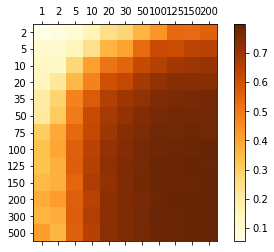

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(acc_results, interpolation=None, cmap='YlOrBr')
fig.colorbar(cax)
plt.xticks(range(len(n_est_range)), n_est_range)
plt.yticks(range(len(depth_range)), depth_range)
plt.show()

### Displaying most important features

We want to visualize which features are the most important for the random forest algorithm.

In [14]:
feature_names = tfidf.get_feature_names()
feature_importances = highest_rf.feature_importances_

best_features = [(x,y) for y,x in sorted(zip(feature_importances, feature_names), reverse=True)]
best_features[:10] # 10 most important features

[('sale', 0.0066208314538683741),
 ('dod', 0.0053850290315864222),
 ('windows', 0.0053434956936931153),
 ('car', 0.0049974879554068987),
 ('bike', 0.0045496062890531515),
 ('israel', 0.0033781096432624418),
 ('clipper', 0.0033499928201561301),
 ('god', 0.0031485517849484863),
 ('space', 0.0031345487721886108),
 ('mac', 0.0029033394421894097)]